# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

In [1]:
# Based on job information, we must predict salaries.  

Write the problem in your own words here

In [1]:
#!/usr/bin/env python3
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

#your info here
__author__ = "Khalid Rahman"
__email__ = "kirahman2@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
# 1. COMPLETED create model container, 
# 2. test new features
# 3. tuning model 
# 4. Intend on creating new features and seeing how you can improve the model.
# Later: -store model in file -load model

### ---- 3 Clean the data ----

### ---- 4 Explore the data (EDA) ----

In [621]:
class Data:
    def __init__(self, train_file, train_target_file, test_file, col_cat, col_num, col_id, col_target):
        self.col_cat = col_cat
        self.col_num = col_num
        self.col_all = col_cat + col_num
        self.col_id = col_id
        self.col_target = col_target
        self.train_df_eda = self._create_train_eda(train_file, train_target_file)
        self.train_df = self._create_train_df(train_file, train_target_file)
#         self.train_df = self._shuffle_data(self.train_df) # KEEP
        self.test_df = self._create_test_df(test_file)
        
    def _create_train_df(self, train_feature_df, train_target_df):
        train_target = self._load_file(train_target_df)
        train_df = self._load_file(train_feature_df)
        train_df = self._join_df(train_df, train_target, col_id)
        train_df = self._clean_data(train_df)
        train_df = self._label_encode(train_df, self.col_cat)
        return train_df
    
    def _create_train_eda(self, train_feature_df, train_target_df):
        train_target = self._load_file(train_target_df)
        train_df = self._load_file(train_feature_df)
        train_df = self._join_df(train_df, train_target, col_id)
        train_df = self._clean_data(train_df)
        return train_df
    
    def _create_test_df(self, test_file):
        test_df = self._load_file(test_file)
        test_df = self._label_encode(test_df, col_cat)
        return test_df

    def _shuffle_data(self, train_df):
        train_df = shuffle(train_df, random_state=42)
        return train_df

    def _clean_data(self, df):
        train_df = df
        train_df = train_df[train_df.salary>0]
        return train_df
    
    def _label_encode(self, train_df, col_cat):
        le = LabelEncoder()
        for col in col_cat:
            train_df[col] = le.fit_transform(train_df[col])
        return train_df
         
    def _join_df(self, train_df, train_target, col_id):
        return pd.merge(train_df, train_target, on=col_id, how='inner')

    def _load_file(self, file):
        return pd.read_csv(file)
    
# train_file = '/Users/krahman/work/salarypredictionportfolio_old/data/train_features.csv'
# test_file = '/Users/krahman/work/salarypredictionportfolio_old/data/test_features.csv'
# train_target_file = '/Users/krahman/work/salarypredictionportfolio_old/data/train_salaries.csv'
# col_cat = ['companyId', 'jobType', 'degree', 'major', 'industry']
# col_num = ['milesFromMetropolis', 'yearsExperience']
# col_all = col_cat + col_num
# col_id = 'jobId'
# col_target = 'salary'

# data = Data(train_file, train_target_file, test_file, col_cat, col_num, col_id, col_target)

In [622]:
class FeatureEngineering:
    def __init__(self, data):
        self.data = data
        self.group_df = data.train_df.groupby(col_cat)
        self.group_df = self._calculate_stats(self.group_df)
        self._add_columns(self.group_df)
#         self.group_df = self._merge_df(data.train_df, self.group_df)
        self.data.train_df = self._merge_df(data.train_df, self.group_df)
        self.data.test_df = self._merge_df(data.test_df, self.group_df)
        
    def _calculate_stats(self, group_df):
        group_df = pd.DataFrame({'group_mean': group_df[data.col_target].mean()})
        group_df['group_min'] = self.group_df[data.col_target].min()
        group_df['group_max'] = self.group_df[data.col_target].max()
        group_df['group_std'] = self.group_df[data.col_target].std()
        group_df['group_median'] = self.group_df[data.col_target].median()
        return group_df
    
    def _merge_df(self, feature_df, group_df):
        final_df = pd.merge(left=feature_df, right=group_df, how='left', on=col_cat)
        final_df = final_df.fillna(0)
        return final_df
    
    def _add_columns(self, group_df):
        col_add = list(group_df.columns)
        col_temp = data.col_all + col_add
        self.data.col_all = data.col_all + col_add
        return

# fe = FeatureEngineering(data)

In [485]:
class Model:
    def __init__(self, train_features, train_target, model_container, set_cv, num_proc, dir_pred):
        self.train_features = train_features
        self.train_target = train_target
    
    def add_model(self, model):
        model_container[model] = self._score_model(model, self.train_features, self.train_target, set_cv, num_proc)
    
    def fit_model(self, model, train_df, train_target):
        return model.fit(train_df, train_target)
        
    def predict_model(self, model_selected, test_df, train_df, train_target):
        model = self.fit_model(model_selected, train_df, train_target)
        prediction_results = model.predict(test_df)
        self._save_prediction(prediction_results)
        return prediction_results
        
    def best_scoring_model(self, model_container):
        best_model = min(model_container, key=model_container.get)
        best_score = model_container.get(best_model)
        self._print_summary(best_model, best_score)
        return best_model
    
    def _print_summary(self, best_model, best_score):
        print('The best model is:\n', best_model)
        print('\nThe best score is:', best_score)
        
    def _score_model(self, model, train_df, target_train, set_cv, num_proc):
        return -1.0*np.mean(cross_val_score(model, train_df, target_train, scoring='neg_mean_squared_error', cv=set_cv, n_jobs=num_proc))

    def _save_prediction(self, prediction_results):
        prediction_results = pd.DataFrame(prediction_results).to_csv(dir_pred)

In [675]:
train_file = '/Users/krahman/work/salarypredictionportfolio_old/data/train_features.csv'
test_file = '/Users/krahman/work/salarypredictionportfolio_old/data/test_features.csv'
train_target_file = '/Users/krahman/work/salarypredictionportfolio_old/data/train_salaries.csv'
col_cat = ['companyId', 'jobType', 'degree', 'major', 'industry']
col_num = ['milesFromMetropolis', 'yearsExperience']
col_all = col_cat + col_num
col_id = 'jobId'
col_target = 'salary'

data = Data(train_file, train_target_file, test_file, col_cat, col_num, col_id, col_target)
fe = FeatureEngineering(data)

In [709]:
df1 = data.train_df_eda
df2 = df1[['jobId','jobType','salary']].groupby('jobType').mean().sort_values('salary',ascending=True).reset_index()
jobtypes_list = df2.jobType.unique()

# do we signal this in the data with a ratio? Or is there a better way? Can we involve 
# salary in some way? Can we apply a course correction with salary? Can we multiply the 
# ratio column with salary and add that as a feature? 

dict_jobtypes = {}
avg_salary_list = []
for val in range(0,len(df2)):
    val2 = df2.loc[val,'salary'] / df2.loc[len(df2)-1,'salary']
    avg_salary_list.append(val2)

for i in range(0,len(jobtypes_list)):
    dict_jobtypes.update([(jobtypes_list[i], avg_salary_list[i])])

df1['jobType_ratio'] = df1.jobType.map(dict_jobtypes)
df1 = df1[['jobId', 'jobType_ratio', 'salary']]

In [847]:
df1 = data.train_df_eda
df2 = df1[['jobId','jobType','salary']].groupby('jobType').mean().sort_values('salary',ascending=True).reset_index()
jobtypes_list = df2.jobType.unique()

dict_jobtypes = {}
avg_salary_list = []
for val in range(0,len(df2)):
    val2 = df2.loc[val,'salary'] #/ df2.loc[len(df2)-1,'salary']
    avg_salary_list.append(val2)

for i in range(0,len(jobtypes_list)):
    dict_jobtypes.update([(jobtypes_list[i], avg_salary_list[i])])

df1['jobType_ratio'] = df1.jobType.map(dict_jobtypes)
df1 = df1[['jobId', 'jobType_ratio']]


'salary'

In [884]:
class FeatureEngineering2:
    def __init__(self, train_df_eda, train_df, col_cat, target):
        df_temp = pd.DataFrame()
        df_new = pd.DataFrame()
        df_new = train_df_eda[['jobId']]
#         print(df_new.shape)
        self._groupby_test(train_df_eda, train_df, df_new, col_cat, target)
#         self._create_dictionary(train_df_eda, df_temp, col_cat)
    
    def _groupby_test(self, train_df_eda, train_df, df_new, col_cat, col_target):
        for i in range(0, len(col_cat)):
            df_temp = train_df_eda.groupby(col_cat[i])[col_target].mean().sort_values(ascending=True).reset_index()
            
            # put in dictionary
            list_col_temp = df_temp[col_cat[i]]
            list_col_target = df_temp[col_target]
            dict_temp ={}
            for j in range(0,len(df_temp)):
                dict_temp.update([(list_col_temp[j], list_col_target[j])]) 
            
            train_df_eda[col_cat[i]].map(dict_temp)
            # ^^ the command above currently returns mapped values and full columns. We 
            # need it return that plus jobId. Our end product for above line must be 
            # jobId and _mean columns. Once we have that, we must merge with df_new on jobId.
            
#             df_new[col_cat[i] +'_mean'] = train_df_eda[col_cat[i]].map(dict_temp)
            # we need to merge these instead of .. what we're doin now.. this needs to have
            # jobId with every df_temp or something
            
#         print(df_new)
        return 
    def _map_values(self):
        # we need to use the train_df and train_df_eda
        return
    
    def _create_dictionary(self, train_df_eda, df_temp, col_cat):
        dict_temp={}
 
FeatureEngineering2(data.train_df_eda, data.train_df, data.col_cat, data.col_target);

0         115.345049
1         115.756548
2         116.224249
3         116.199380
4         115.888501
5         115.847117
6         115.847117
7         116.176489
8         115.934192
9         116.515543
10        116.134865
11        115.888501
12        116.230808
13        115.589785
14        115.393540
15        115.934192
16        116.303495
17        116.318607
18        116.446275
19        116.199339
20        116.680892
21        115.934192
22        115.659435
23        116.199380
24        115.934192
25        115.953528
26        116.199380
27        116.402176
28        116.113029
29        115.622239
             ...    
999970    116.113029
999971    116.279872
999972    116.019619
999973    116.446275
999974    115.888501
999975    115.649274
999976    116.318607
999977    115.943206
999978    115.342355
999979    116.113029
999980    116.515543
999981    115.948785
999982    116.515543
999983    115.800063
999984    116.048609
999985    116.279872
999986    116

In [756]:
temp_df = data.train_df_eda
df3 = data.train_df_eda.groupby('jobType')['salary'].mean().reset_index()

dict_temp ={}
for i in range(0,len(df3)):
    dict_temp.update([(df3['jobType'][i], df3['salary'][i])])
temp_df['jobtype_mean'] = temp_df.jobType.map(dict_temp)
# dict_temp
# temp_df
# train_eda, merge on loop, where do we place this? 


In [789]:
# temp_df

In [711]:
# train_features = data.train_df[data.col_all]
train_features = data.train_df

In [712]:
train_features = pd.merge(left=train_features, right=df1, how='inner', on='jobId')
train_features.shape
# NEXT, apply groupby methods to all categorical columns. Take the average salary of each, then add these new
# features to our df, then test model. 
train_features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,group_mean,group_min,group_max,group_std,group_median,jobType_ratio
0,JOB1362684407687,31,1,3,6,3,10,83,130,130.875000,98,150,19.555324,136.0,135.458547
1,JOB1362684407688,11,0,2,7,6,3,73,101,138.031250,90,204,29.306248,132.0,145.311425
2,JOB1362684407689,48,7,1,8,3,10,38,137,142.000000,116,173,28.827071,137.0,125.368630
3,JOB1362684407690,32,5,1,2,0,8,17,142,129.000000,77,169,29.251781,131.0,115.368518
4,JOB1362684407691,60,7,0,8,2,8,16,163,153.583333,94,232,46.310137,141.5,125.368630
5,JOB1362684407692,7,5,1,3,2,2,31,113,153.750000,113,206,39.769125,148.0,115.368518
6,JOB1362684407693,7,1,4,7,3,23,24,178,119.134615,65,178,28.136940,120.5,135.458547
7,JOB1362684407694,17,4,0,2,1,9,70,73,68.818182,46,90,13.622174,72.0,95.333087
8,JOB1362684407695,13,3,2,7,1,1,54,31,50.727273,19,97,18.189992,50.0,70.813045
9,JOB1362684407696,36,7,0,2,0,17,68,104,124.625000,71,186,35.904387,117.0,125.368630


In [696]:
train_features = train_features[data.col_all]
# train_features

In [697]:
# train_features = data.train_df[data.col_all]
# train_features = pd.concat([train_features,df1['jobType_ratio']],axis=1)

train_target = data.train_df[col_target]
test_df = data.test_df[data.col_all]

# data = Data(train_file, train_target_file, test_file, col_cat, col_num, col_id, col_target)      
# fe = FeatureEngineering(data)
# Heatmap(train_features, train_target, 'Heatmap of Correlation Matrix');

set_cv = 2
num_proc = -1
dir_pred = '/Users/krahman/work/salarypredictionportfolio_old/data/prediction/prediction_results.csv'
model_container = {}
model = Model(train_features, train_target, model_container, set_cv, num_proc, dir_pred)
# 314.8

In [702]:
assert 0==0

In [698]:
model.add_model(GradientBoostingRegressor(loss='ls', learning_rate=.1, alpha=.1, n_estimators=180, subsample=1, max_depth=4))
# model.add_model(LinearRegression())
selected_model = model.best_scoring_model(model_container)
# model.predict_model(selected_model, test_df, train_features, train_target)

The best model is:
 GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=180,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

The best score is: 314.8008805848193


In [568]:
# # we need to ingest a model, ingest parameters, create param_grid
# class RandomSearch:
#     def __init__(self, model):
#         self.model = model
#     return
# gs = RandomSearch()

In [147]:
# # TESTING BY INDUSTRY 
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import time

# # before we score it, we need to predict, then inverse transform
# def scoring_gbr_gs():
#     score_total = 0
#     loss_types = ['ls', 'lad', 'huber', 'quantile']
#     learning_rate = [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9]
#     alpha= [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]
#     n_estimators = [100,200,300,400,600,1000,2000]
#     subsample =[1,.9,.8,.7,.6,.5,.4,.3,.2,.1]
#     max_depth = [1,2,3,4,5,6,7,8,9,10]
#     model_gbr = GradientBoostingRegressor()
#     param_grid = dict(
#                      loss=['ls'],
#                      learning_rate=[.1],
#                       alpha=[.1],
#                       n_estimators=[180],
#                      subsample=[1],
#                      max_depth=[4]
#                      )
#     random = RandomizedSearchCV(estimator=model_gbr,
#                                 param_distributions=param_grid,
#                                 scoring='neg_mean_squared_error',
#                                 n_jobs=-1,
#                                 cv=5)
    
# #     for val in ['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE']:
#     df = data.train_df
#     train_temp = df[df['industry']=='HEALTH']
#     y_train_temp = train_temp.pop('salary')
#     train_temp = train_temp.drop(['industry'],axis=1)

# #     train_temp = train_temp.drop(['jobType', 'degree', 'major', 'industry'],axis=1)

#     random_fit = random.fit(train_temp,y_train_temp)
#     scores = random_fit.best_score_
#     print(scores)
#     score_total = score_total + scores
#     print(random_fit.best_params_)
        
# #     score_avg = score_total/7
# #     print('Average score')
# #     print(score_avg)
#     return scores

# start_time = time.time()
# scores = scoring_gbr_gs()
# elapsed_time = time.time() - start_time
# print(elapsed_time) 

salary                 1.000000
group_mean             0.755125
group_median           0.744016
group_min              0.698254
group_max              0.587387
yearsExperience        0.375013
group_std              0.337293
industry               0.086500
companyId             -0.000993
jobType               -0.228672
degree                -0.231794
major                 -0.262435
milesFromMetropolis   -0.297686
Name: salary, dtype: float64


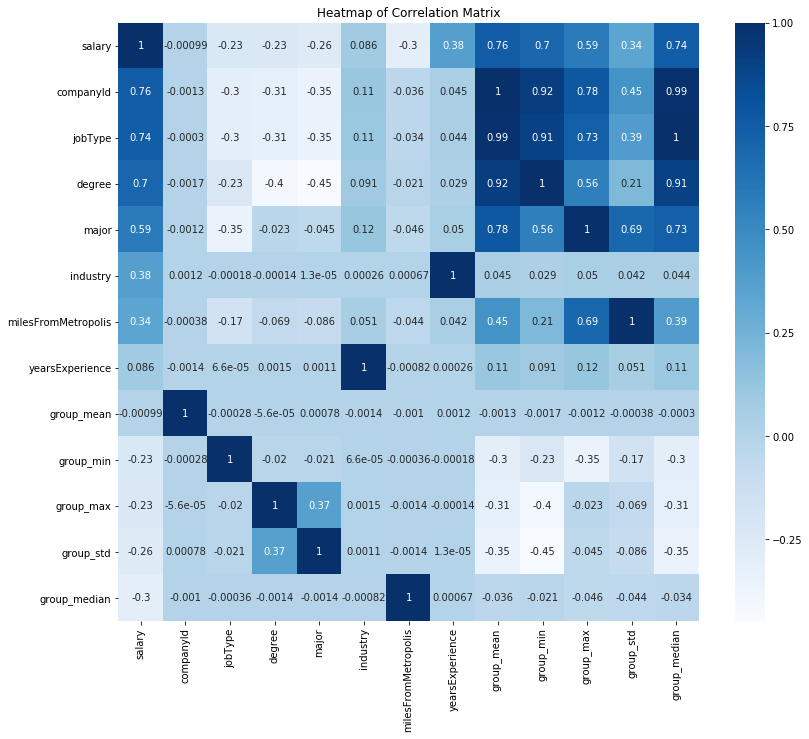

In [708]:
class Heatmap:
    def __init__(self, train_df, target, title):
        '''initializes class and concatenates train_df and target variables'''
        self.df = self._concat_df(train_df, target)
        self.col = df.columns
        self.target = target.name
        self.heatmap = self._create_corr_df(self.df, self.col, self.target, title)
        
    def _concat_df(self, train_df, target):
        '''concatenates training dataframe and target variable''' 
        return pd.concat([train_target, train_features],axis=1)
    
    def _create_corr_df(self, df, col, target, title):
        '''creates correlation matrix from train_df'''
        corr = df.corr().sort_values(target, ascending=False)
        print(corr[target])
        self._create_heatmap(corr)
        self._set_title(title)
        
    def _create_heatmap(self, corr):
        '''creates heatmap from correlation matrix'''
        plt.figure(figsize=(13,11))
        return sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Blues', annot=True)
        
    def _set_title(self, title):
        '''sets title of correlation matrix'''
        plt.title(title)
    
Heatmap(train_features, train_target, 'Heatmap of Correlation Matrix');

In [457]:
class Boxplot:
    def __init__(self, train_df, target, var, title):
        self.df = train_df
        self._create_subplot()
        col_avgs = self._calc_averages(df, target.name, var)
        self._create_boxplot(df, var, target, col_avgs)
        self._set_title(title)
        
    def _create_subplot(self):
        plt.subplots(figsize=(12,6.5))
        
    def _calc_averages(self, df, target, var):
        temp_df = df[[var, target]].groupby(var).mean().sort_values(target, ascending=True).reset_index()
        return temp_df[var].values

    def _create_boxplot(self, df, var, target, col_avgs):
        sns.boxplot(var, target.name, data=df, width=.3, color='#eeefff', order=col_avgs)
    
    def _set_title(self, title):
        plt.title(title)

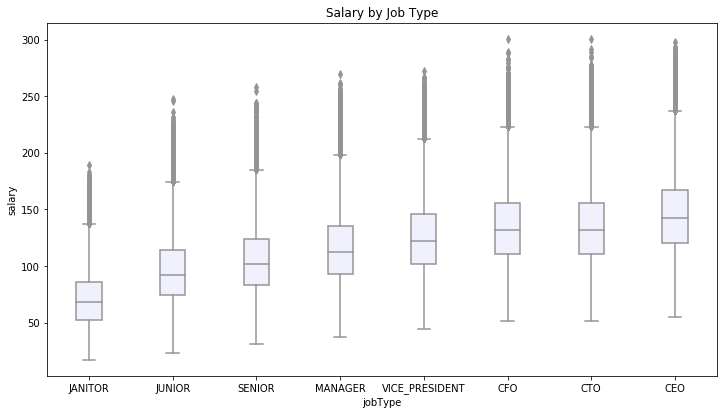

In [458]:
Boxplot(data.train_df_eda, train_target, 'jobType', 'Salary by Job Type');

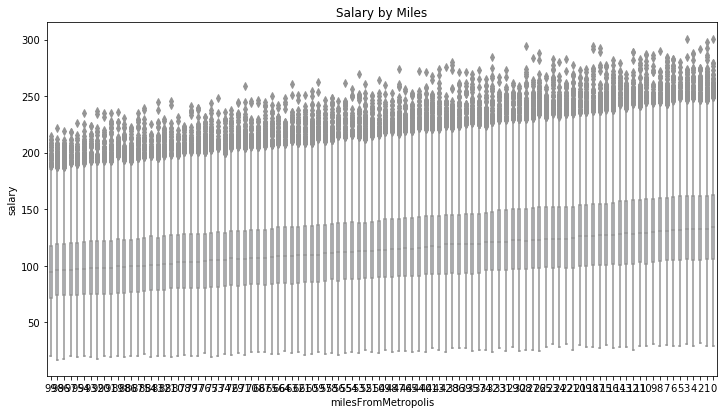

In [480]:
Boxplot(data.train_df_eda, train_target, 'milesFromMetropolis', 'Salary by Miles');

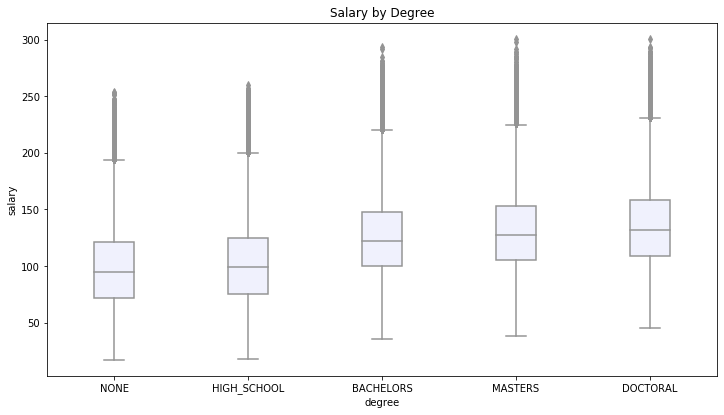

In [459]:
Boxplot(data.train_df_eda, train_target, 'degree', 'Salary by Degree');

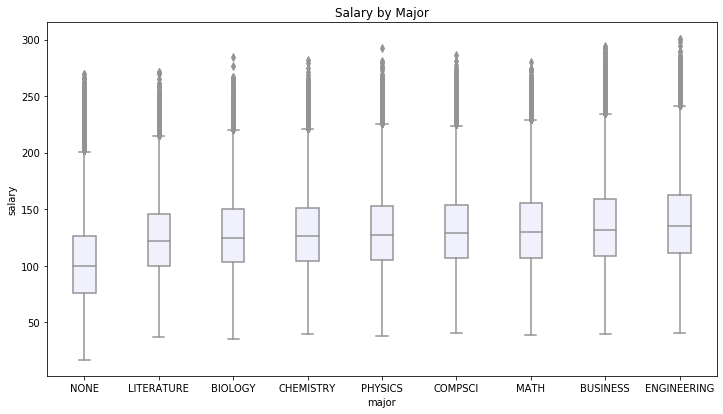

In [460]:
Boxplot(data.train_df_eda, train_target, 'major', 'Salary by Major');

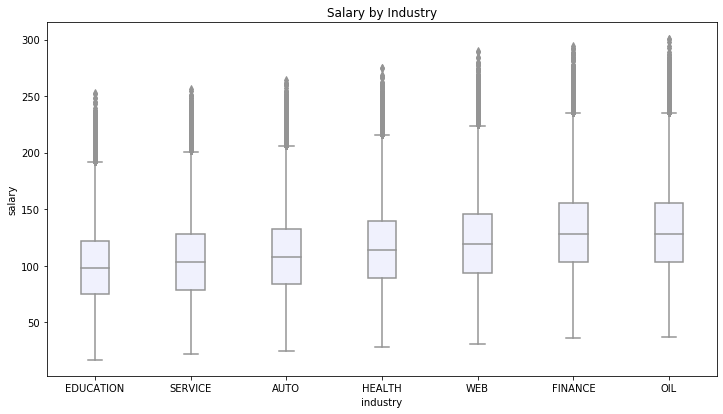

In [553]:
Boxplot(data.train_df_eda, train_target, 'industry', 'Salary by Industry');

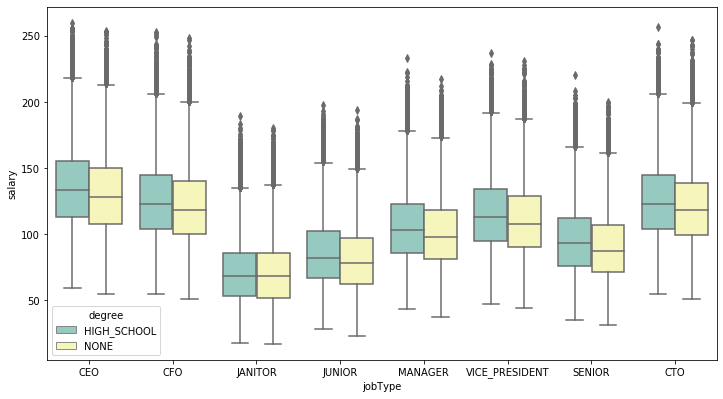

In [481]:
# clean this code
class EDA:
    def __init__(self, data):
        self.data = data
        df = data.train_df_eda
        target = data.train_df_eda.salary
        
    def boxplot(self, col1, var1, var2, col3):
        df = data.train_df_eda
        target = data.train_df_eda.salary
        df = df[(df[col1]==var1) | (df[col1]==var2)]
        f, ax = plt.subplots(figsize=(12,6.5))
        sns.boxplot(x=col3, y=target, hue=col1, data=df, palette='Set3')
        return

eda = EDA(data)
eda.boxplot('degree', 'HIGH_SCHOOL', 'NONE', 'jobType')

### ---- 5 Establish a baseline ----

In [ ]:
# we must look very carefully at the data and see opportunities to create more signal in the data that will make 
# the algorithm pick up on certain things that enhance accuracy of predictions. 

### ---- 6 Hypothesize solution ----

In [ ]:
# brainstorm 3 models that you think may improve results over the baseline model based
# read documentation and determine good models to try 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

# FEATURE ENGINEERING NOTES 
# jobType - we've already created this features
# degree - create feature, 0=high school, none, 1=others.
# degree - create another feature, 0=high school, none, 1=bachelors,masters, 2=phd

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data